In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [31]:
data = pd.read_csv('./heart3.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
print(np.unique(data['target'], return_counts=True))

(array([0, 1]), array([138, 165]))


In [33]:
x_var = data.drop(columns='target', axis = 1)
y_var = data['target']
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3)

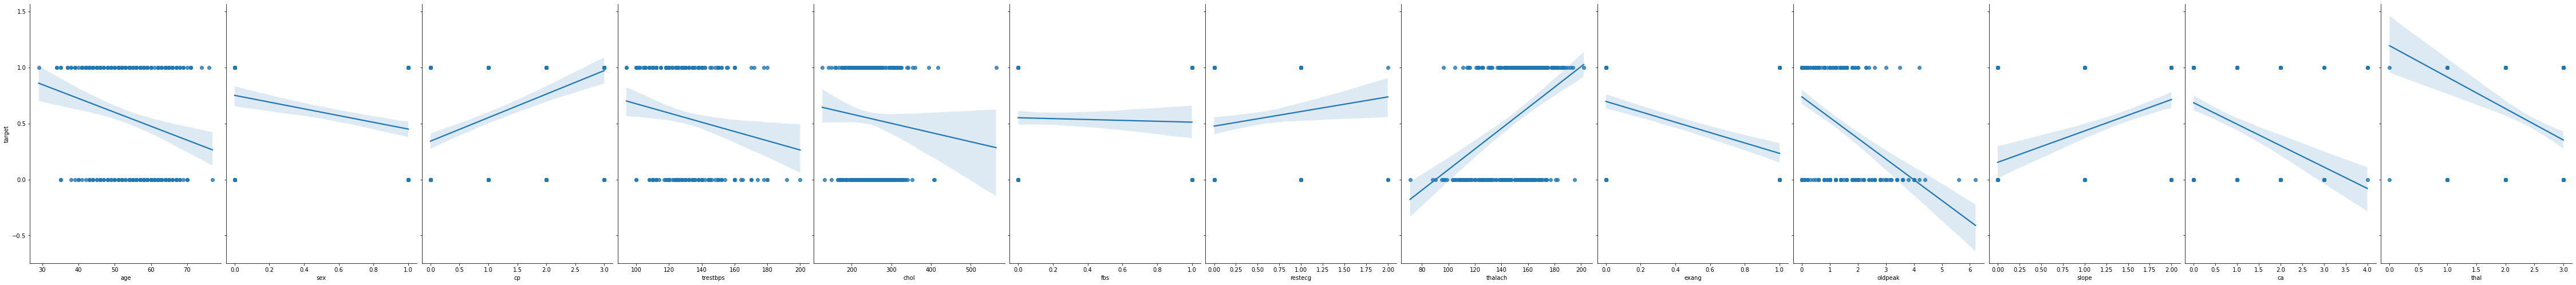

In [34]:
%matplotlib inline
sns.pairplot(data, x_vars=x_var.columns, y_vars='target', height=7, aspect=0.7, kind='reg')

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/home/sal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = lr.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.76      0.98      0.86        53

    accuracy                           0.81        91
   macro avg       0.86      0.78      0.79        91
weighted avg       0.84      0.81      0.80        91



/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


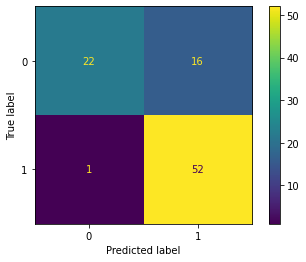

In [37]:
plot_confusion_matrix(lr, x_test, y_test)

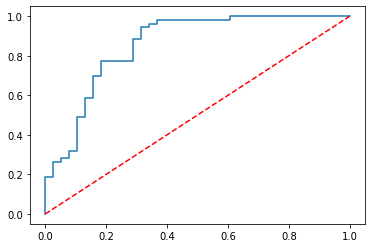

In [38]:
y_true = []
for i in y_test:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)

proba = lr.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_true, proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()